In [2]:
#1. Access the project/sales data from the sharable google drive link using !gdown

#2. Git clone the project from the original repository
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 41 (delta 5), reused 5 (delta 5), pack-reused 32
Receiving objects: 100% (41/41), 4.84 MiB | 18.24 MiB/s, done.
Resolving deltas: 100% (18/18), done.


#Sales Analysis
##Import Necessary Libraries

In [48]:
import pandas as pd
import os
import numpy as np

####Task 1:Merging 12 Months of Sales Data into a Single File

In [4]:
#Creating an empty df to store all contatenated data
all_months_data = pd.DataFrame()

#Using the OS library to access a directory using listdir.
files = [file for file in os.listdir('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]

#Concatenate all the files in accessed directory above
for file in files:
  df = pd.read_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/" +file)
  all_months_data = pd.concat([df,all_months_data])



In [5]:
all_months_data.sort_values(by="Order Date")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#We use reset index in order to drop the index column so that the new index column matches the shape
all_months_data.reset_index(drop = True, inplace = True)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
#We have make the index = False because we do not want there to be an extra index column in the data.
#Index = True/False is not realted to reset index
all_months_data.to_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/2019_Sales.csv", index = False)


#### Read updated df with all 12 months of data


In [8]:
sales_2019 = pd.read_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/2019_Sales.csv")
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [9]:
#Checking which columns have null values.
sales_2019.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#Since all columns have equal null values, chances are that we have entire rows of n/a
sales_2019[sales_2019['Order Date'].isna()==True]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Drop all rows which contain all N/a values so that we can convert the month column to int
sales_2019.dropna(how = "all", inplace = True)

In [12]:
sales_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
#Updating the df so that it contains only the valid order dates (int)
sales_2019 = sales_2019[sales_2019["Order Date"].str[0:2]!="Or"]

#### What was the best month for sales and how much was earned that month?

### Analysis on the Data

#### Task 2: Add Month Column

In [14]:
#Extracting the month from the order date column and coverting it to int
sales_2019["Month"] = sales_2019["Order Date"].str[0:2].astype(int)
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


#### Convert columns to correct data type

In [15]:
#After checking the data type of the columns, we will convert the columns to the correct data type so that it will be easier to calculate sales = price * quantity
sales_2019.info()

print()

sales_2019["Quantity Ordered"] = pd.to_numeric(sales_2019["Quantity Ordered"])
sales_2019["Price Each"] = pd.to_numeric(sales_2019["Price Each"])

print()

sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date 

#### Task 3: add sales column by multipling quanity ordered and price each

In [16]:
sales_2019["Sales"] = sales_2019["Quantity Ordered"] * sales_2019["Price Each"]

In [17]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


In [18]:
#Re-arranging the columns by using sales_2019.columns and then seleting the correct order as desired
print(sales_2019.columns)
sales_2019 = sales_2019[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales','Order Date','Month','Purchase Address']]
sales_2019

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,11.95,06/23/19 19:34,6,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.00,1700.00,06/30/19 10:05,6,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,999.99,06/24/19 20:18,6,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,149.99,06/05/19 10:21,6,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,99.99,06/25/19 18:58,6,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


#### What was the best month for sales?

In [19]:
monthly_sales = sales_2019.groupby("Month").sum()[["Sales"]]
monthly_sales

<ipython-input-19-01f924bcce12>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = sales_2019.groupby("Month").sum()[["Sales"]]


,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


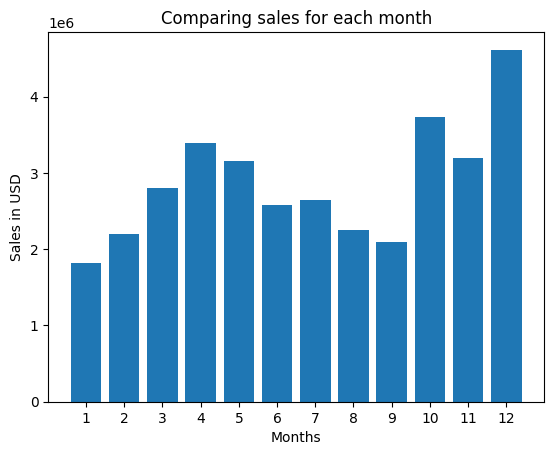

In [20]:
#We will be plotting a bar graph to compare the sales for each month. The x axis will include each month (index column of montly_sales) and y axis will include total sales
import matplotlib.pyplot as plt

plt.bar(monthly_sales.index, monthly_sales["Sales"])

plt.title("Comparing sales for each month")
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.xticks(monthly_sales.index)
plt.show()

#According to the bar graph, the best month for sales is December

#### Question 4: What City had the Highest Sales?

In [21]:
# We define a function in order to obtain the City & State from an address. The first split will help up in getting the city and the 2nd split helps us get the state and postal code.
# In order to obtain the state, we need to obtain just the first 2 characters from the 2nd split
def get_city(x):
  return x.split(",")[1] + ", " + x.split(",")[2][1:3]

sales_2019["City & State"] = sales_2019["Purchase Address"].apply(get_city)

#Alternative method using lambda function to obtain
#sales_2019["City"] = sales_2019["Purchase Address"].apply(lambda x: x.split(",")[1] + ", " + x.split(",")[2][1:3])

In [22]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City & State
0,209921,USB-C Charging Cable,1,11.95,11.95,06/23/19 19:34,6,"950 Walnut St, Portland, ME 04101","Portland, ME"
1,209922,Macbook Pro Laptop,1,1700.00,1700.00,06/30/19 10:05,6,"80 4th St, San Francisco, CA 94016","San Francisco, CA"
2,209923,ThinkPad Laptop,1,999.99,999.99,06/24/19 20:18,6,"402 Jackson St, Los Angeles, CA 90001","Los Angeles, CA"
3,209924,27in FHD Monitor,1,149.99,149.99,06/05/19 10:21,6,"560 10th St, Seattle, WA 98101","Seattle, WA"
4,209925,Bose SoundSport Headphones,1,99.99,99.99,06/25/19 18:58,6,"545 2nd St, San Francisco, CA 94016","San Francisco, CA"


In [23]:
city_sales = sales_2019.groupby("City & State")[["Sales"]].sum()
city_sales["Sales"].sort_values(ascending = False)

City & State
 San Francisco, CA    8262203.91
 Los Angeles, CA      5452570.80
 New York City, NY    4664317.43
 Boston, MA           3661642.01
 Atlanta, GA          2795498.58
 Dallas, TX           2767975.40
 Seattle, WA          2747755.48
 Portland, OR         1870732.34
 Austin, TX           1819581.75
 Portland, ME          449758.27
Name: Sales, dtype: float64

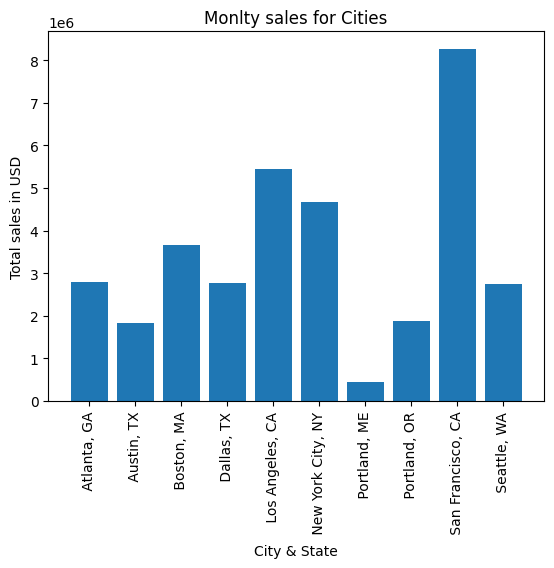

In [24]:
plt.bar(city_sales.index, city_sales["Sales"])

plt.title("Monlty sales for Cities")
plt.xlabel("City & State")
plt.ylabel("Total sales in USD")

#We added this rotation in order to make everything verticle so that everything is more readable
plt.xticks(rotation = 90)

plt.show()

#According to the bar graph, the best city for sales is San Fransico

#### Question 3: What is the best time for sales?


In [25]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City & State
0,209921,USB-C Charging Cable,1,11.95,11.95,06/23/19 19:34,6,"950 Walnut St, Portland, ME 04101","Portland, ME"
1,209922,Macbook Pro Laptop,1,1700.00,1700.00,06/30/19 10:05,6,"80 4th St, San Francisco, CA 94016","San Francisco, CA"
2,209923,ThinkPad Laptop,1,999.99,999.99,06/24/19 20:18,6,"402 Jackson St, Los Angeles, CA 90001","Los Angeles, CA"
3,209924,27in FHD Monitor,1,149.99,149.99,06/05/19 10:21,6,"560 10th St, Seattle, WA 98101","Seattle, WA"
4,209925,Bose SoundSport Headphones,1,99.99,99.99,06/25/19 18:58,6,"545 2nd St, San Francisco, CA 94016","San Francisco, CA"


In [26]:
#Coverting ["Order Date"] to datetime so that we can add an ["Hour"] column to the df

sales_2019["Hour"] = pd.to_datetime(sales_2019["Order Date"]).dt.hour
sales_2019.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City & State,Hour
0,209921,USB-C Charging Cable,1,11.95,11.95,06/23/19 19:34,6,"950 Walnut St, Portland, ME 04101","Portland, ME",19
1,209922,Macbook Pro Laptop,1,1700.00,1700.00,06/30/19 10:05,6,"80 4th St, San Francisco, CA 94016","San Francisco, CA",10
2,209923,ThinkPad Laptop,1,999.99,999.99,06/24/19 20:18,6,"402 Jackson St, Los Angeles, CA 90001","Los Angeles, CA",20
3,209924,27in FHD Monitor,1,149.99,149.99,06/05/19 10:21,6,"560 10th St, Seattle, WA 98101","Seattle, WA",10
4,209925,Bose SoundSport Headphones,1,99.99,99.99,06/25/19 18:58,6,"545 2nd St, San Francisco, CA 94016","San Francisco, CA",18


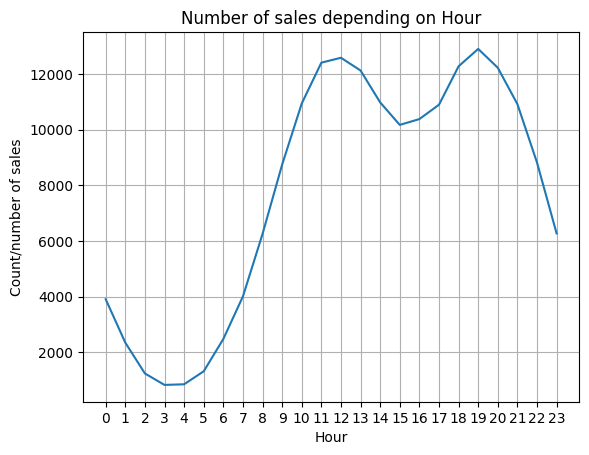

In [27]:
#Instead of aggreating using the sum(), we will be using the count() instead because we are interested when there was the number of sales, not renvenue
hourly_sales_count = sales_2019.groupby(["Hour"]).count()

plt.plot(hourly_sales_count.index, hourly_sales_count["Sales"])

plt.title("Number of sales depending on Hour")
plt.xlabel("Hour")
plt.ylabel("Count/number of sales")
plt.xticks(hourly_sales_count.index)
plt.grid()
plt.show()

#According to the line chart, the best time for number of sales is 11am-12pm annd 7pm-8pm

#### Question 4: What products are most often sold together?

In [28]:
#First, we will retrieve all the columns which have dublicated vales in the column ["Order ID"]
most_sold_together = sales_2019[sales_2019["Order ID"].duplicated(keep = False)]

In [29]:
#Grouping ["Order ID"] by the ["Product"] and using transform() to aggregate the result so that we can store it into ["Sold Together"] column
most_sold_together["Sold Together"] = most_sold_together.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
most_sold_together
most_sold_together = most_sold_together[["Order ID", "Sold Together"]].drop_duplicates()
most_sold_together

<ipython-input-29-25e317b89c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_sold_together["Sold Together"] = most_sold_together.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


,Order ID,Sold Together
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [30]:
#Frequent item set mining is being performed in order to group the items that are being sold together
df = most_sold_together.groupby("Sold Together")[["Order ID"]].count().sort_values(by="Order ID",ascending=False).reset_index()
df

#Filtering out the number of items that have been sold together
df[df["Sold Together"].str.split(",").apply(lambda x:True if len(x)==3 else False)].head(10)

,Sold Together,Order ID
8,"Google Phone,USB-C Charging Cable,Wired Headph...",77
10,"iPhone,Lightning Charging Cable,Wired Headphones",56
23,"iPhone,Lightning Charging Cable,Apple Airpods ...",43
45,"Google Phone,USB-C Charging Cable,Bose SoundSp...",31
48,"Vareebadd Phone,USB-C Charging Cable,Wired Hea...",31
61,"iPhone,Apple Airpods Headphones,Wired Headphones",23
63,"Google Phone,Bose SoundSport Headphones,Wired ...",21
87,"Vareebadd Phone,USB-C Charging Cable,Bose Soun...",14
226,"Vareebadd Phone,Bose SoundSport Headphones,Wir...",3
233,"Google Phone,USB-C Charging Cable,AAA Batterie...",3


#### Question 5: What is the most popular product sold?

In [38]:
#We will group the product using the total quantity ordered for that specific product.

popular_product = sales_2019.groupby("Product")[["Quantity Ordered"]].sum()
popular_product.sort_values(by = "Quantity Ordered", ascending = False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


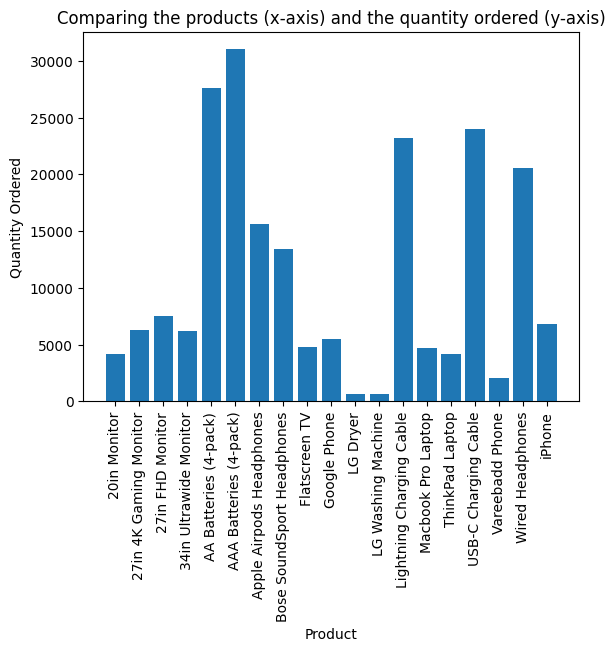

In [40]:
#Creating a bar graph to compare the products (x-axis) and the quantity ordered (y-axis)

plt.bar(popular_product.index, popular_product["Quantity Ordered"])

plt.title("Comparing the products (x-axis) and the quantity ordered (y-axis)")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation = 90)

plt.show()

In [44]:
#Finding the average price of each product by aggregating using the mean() fucntion with the groupby function
average_price = sales_2019.groupby("Product")[["Price Each"]].mean()

In [51]:
average_price

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [55]:
merged_data = pd.merge(popular_product,average_price,on=popular_product.index).rename(columns={"key_0":"Product"})

<ipython-input-67-1a977e7af5d6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merged_data["Product"],rotation = 90)


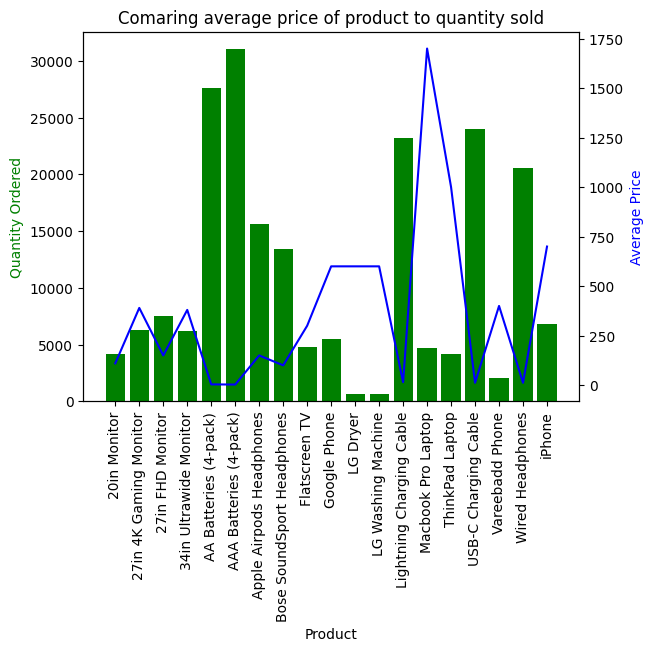

In [67]:
#Creating a twin/dual axis graph to compare the quanity sold of prouct to price of product
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(popular_product.index, popular_product["Quantity Ordered"], color = 'g')
ax2.plot(average_price.index, average_price["Price Each"], 'b-')

plt.title("Comaring average price of product to quantity sold")
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Average Price', color='b')
ax1.set_xticklabels(merged_data["Product"],rotation = 90)
plt.show()